# Hot Laps

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## Are some teams and drivers better at race starts?

In [2]:
grid = (
    f1.qualifying
    .join(f1.drivers['driver'], on='id_driver')
    .join(f1.races['date id_circuit season'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .sort_values('date circuit driver'.split())
    ['season circuit driver best q1 q2 q3'.split()]
    .set_index('season circuit driver'.split())
)
grid

best      q1  \
season circuit                    driver                                 
1994   Autódromo José Carlos Pace Ayrton Senna          75.962  75.962   
                                  Bertrand Gachot       80.729  80.729   
                                  Christian Fittipaldi  78.204  78.204   
                                  Damon Hill            77.554  77.554   
                                  David Brabham         81.186  81.186   
...                                                        ...     ...   
2019   Yas Marina Circuit         Robert Kubica         99.236  99.236   
                                  Romain Grosjean       98.051  98.051   
                                  Sebastian Vettel      95.339  96.963   
                                  Sergio Pérez          96.961  96.961   
                                  Valtteri Bottas       94.973  96.200   

                                                            q2      q3  
season circuit                    driver                                
1994   Autódromo José Carlos Pace Ayrton Senna             NaN     NaN  
                                  Bertrand Gachot          NaN     NaN  
                                  Christian Fittipaldi     NaN     NaN  
                                  Damon Hill               NaN     NaN  
                                  David Brabham            NaN     NaN  
...                                                        ...     ...  
2019   Yas Marina Circuit         Robert Kubica            NaN     NaN  
                                  Romain Grosjean          NaN     NaN  
                                  Sebastian Vettel      95.786  95.339  
                                  Sergio Pérez          97.055     NaN  
                                  Valtteri Bottas       95.674  94.973  

[8354 rows x 4 columns]

In [3]:
from viz import *
from matplotlib.pyplot import imshow

In [4]:
season = 2005

data = grid.xs(season)['best'].unstack('circuit')
data = data.div(data.min(axis=0), axis=1)
data = data.loc[data.median(axis=1).sort_values().index]
data = data.iloc[::-1,:].clip(upper=1.07)
data.head()

circuit,Albert Park Grand Prix Circuit,Sepang International Circuit,Bahrain International Circuit,Autodromo Enzo e Dino Ferrari,Circuit de Barcelona-Catalunya,Circuit de Monaco,Nürburgring,Circuit Gilles Villeneuve,Indianapolis Motor Speedway,Circuit de Nevers Magny-Cours,Silverstone Circuit,Hockenheimring,Hungaroring,Istanbul Park,Autodromo Nazionale di Monza,Circuit de Spa-Francorchamps,Autódromo José Carlos Pace,Suzuka Circuit,Shanghai International Circuit
driver,,,,,,,,,,,,,,,,,,,
Patrick Friesacher,1.070000,1.070000,1.055650,1.070000,1.070000,1.066944,1.065197,1.057926,1.054782,1.047680,1.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Christijan Albers,1.070000,1.070000,1.046267,1.070000,1.063748,1.070000,1.068361,1.039845,1.042577,1.052720,1.058457,1.043044,1.057097,1.062087,1.070000,1.032437,1.038548,1.044644,1.053412
Robert Doornbos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.053727,1.070000,NaN,1.049779,1.031845,NaN,1.063974,1.057185
Tiago Monteiro,1.058949,1.056966,1.039801,1.065268,1.056755,1.070000,1.055128,1.050747,1.040170,1.048850,NaN,1.057575,NaN,1.045082,1.046836,1.048002,1.019434,NaN,1.054773
Narain Karthikeyan,1.050476,1.056426,1.037196,1.040520,1.050297,1.070000,1.067839,1.045827,1.044616,1.046296,1.046030,NaN,1.064783,NaN,1.061587,1.049666,1.035173,1.024617,1.027923


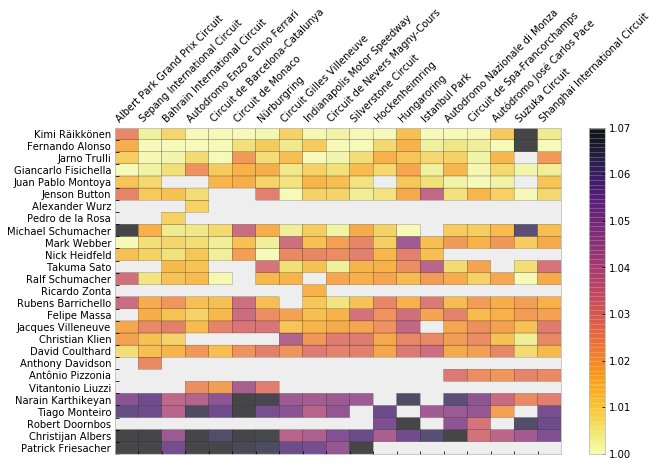

In [5]:
rows, cols, vals = data.index, data.columns, data.values
fig = figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(rows)))
#ax.set_xticklabels(cols, ha='left', rotation=45, rotation_mode='anchor')
ax.set_xticklabels(cols, ha='left', rotation=45)
ax.set_yticklabels(rows, verticalalignment='bottom')
ax.tick_params(labeltop=True, labelbottom=False)
im = ax.pcolor(vals, alpha=0.707, cmap='inferno_r', edgecolors='black')
fig.colorbar(im)

In [8]:
ax.figure.tight_layout()
ax.figure.savefig(DATADIR / 'heat.png')

In [9]:
fig.tight_layout()

## lights out
Qualifying times for each (driver, track) in one season.

## away we go
Positions gained from start to end of first lap for each (driver, track) in one season.